# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [3]:
import tensorflow as tf
from tensorflow import keras

# You just need to call tf.random.set_seed(seed), and it will set the seed of the random 
# number generator to a fixed value so results are reproducible
tf.random.set_seed(42)

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_test.shape

(10000, 28, 28)

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
type(X_train_full)

numpy.ndarray

Each pixel intensity is represented as a byte (0 to 255):

In [8]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [9]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [10]:
X_train.shape

(55000, 28, 28)

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

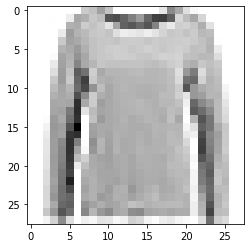

In [11]:
plt.imshow(X_train[360], cmap="binary")
plt.axis('on')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [12]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [13]:
np.unique(y_train, return_counts= True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5543, 5444, 5496, 5499, 5512, 5507, 5507, 5488, 5510, 5494]))

Here are the corresponding class names:

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [15]:
class_names[y_train[360]]

'Pullover'

In [16]:
y_train[360]

2

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [17]:
X_valid.shape

(5000, 28, 28)

In [18]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", name="hidden_layer1"))
model.add(keras.layers.Dense(100, activation="relu", name="hidden_layer2"))
model.add(keras.layers.Dense(10, activation="softmax", name="output_layer"))

Another way of making keras fully connected model is as follows:

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu", name="hidden_layer1"),
    keras.layers.Dense(100, activation="relu", name="hidden_layer2"),
    keras.layers.Dense(10, activation="softmax", name="output_layer")
])

In [21]:
model.layers

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 hidden_layer1 (Dense)       (None, 300)               235500    
                                                                 
 hidden_layer2 (Dense)       (None, 100)               30100     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


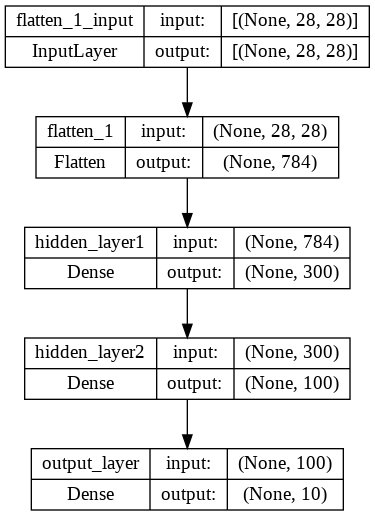

In [23]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [24]:
model.layers[1].name

'hidden_layer1'

In [25]:
model.get_layer(model.layers[1].name)

In [26]:
weights, biases = model.layers[1].get_weights()

In [27]:
weights

array([[ 0.03574536, -0.02389931,  0.01030421, ..., -0.06151724,
        -0.0451347 ,  0.03140047],
       [-0.05467119,  0.04656268, -0.07248728, ..., -0.07038655,
        -0.03083268, -0.06513114],
       [-0.03234808, -0.00317231,  0.04102226, ..., -0.03237895,
         0.01965773, -0.00825518],
       ...,
       [-0.0630435 ,  0.07371157, -0.05752673, ...,  0.07049479,
         0.05577183, -0.02518321],
       [-0.02547856,  0.07304457,  0.04983643, ..., -0.05780029,
         0.07438232, -0.0286764 ],
       [-0.02862201,  0.01245171, -0.04573321, ...,  0.04891213,
        -0.06256616, -0.02975626]], dtype=float32)

In [28]:
weights.shape

(784, 300)

In [29]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
biases.shape

(300,)

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

loss can be sparse_categorical_crossentropy if the output is label encoded. or categorical_crossentropy if the output is one-hot encoded.

In [32]:
history = model.fit(X_train, y_train, epochs=20, shuffle=True, batch_size=32,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7015 - accuracy: 0.7690 - val_loss: 0.5170 - val_accuracy: 0.8208
Epoch 2/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4859 - accuracy: 0.8297 - val_loss: 0.4353 - val_accuracy: 0.8494
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4431 - accuracy: 0.8439 - val_loss: 0.5402 - val_accuracy: 0.7984
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4166 - accuracy: 0.8550 - val_loss: 0.3963 - val_accuracy: 0.8632
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3982 - accuracy: 0.8609 - val_loss: 0.3796 - val_accuracy: 0.8674
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3795 - accuracy: 0.8668 - val_loss: 0.3735 - val_accuracy: 0.8710
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3671 - accuracy: 0.8714 - val_loss: 0.3633 - val_accuracy:

steps here is equivalent to number of training samples divided by batch size noting that .fit has a default value for batch_size paramter of 32. 

The convention in batch_size is to be 2^n where n is between 1 to intinity based on your RAM or VRAM capabilities.

In [33]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 1719}

In [34]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

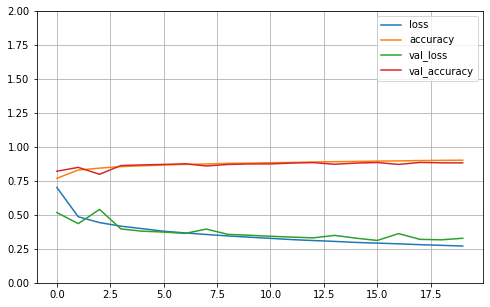

In [36]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [37]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.701493,0.769036,0.516960,0.8208
1,0.485929,0.829709,0.435262,0.8494
2,0.443055,0.843891,0.540177,0.7984
3,0.416559,0.855000,0.396296,0.8632
4,0.398229,0.860909,0.379647,0.8674
5,0.379526,0.866782,0.373511,0.8710
6,0.367077,0.871382,0.363256,0.8756
7,0.355641,0.874382,0.395349,0.8598
8,0.344823,0.878964,0.356437,0.8706
9,0.335820,0.880255,0.349770,0.8746


In [38]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3628 - accuracy: 0.8680


[0.3627777695655823, 0.8679999709129333]

In [39]:
X_new = X_test
y_proba = model.predict(X_new)
y_proba.round(2)

313/313 [==============================] - 1s 2ms/step


array([[0.  , 0.  , 0.  , ..., 0.08, 0.  , 0.86],
       [0.  , 0.  , 0.98, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.  ]], dtype=float32)

In [40]:
X_test[:3].shape

(3, 28, 28)

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

In [41]:
# y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [42]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

In [43]:
y_test[:1].shape

(1,)

In [44]:
y_new = y_test[:1]
y_new

array([9], dtype=uint8)

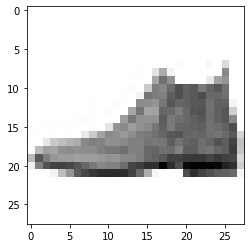

In [45]:
plt.imshow(X_test[0],cmap="binary")

# Regression MLP

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [46]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [47]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 1.7566 - val_loss: 0.8978
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.8452 - val_loss: 1.0379
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7734 - val_loss: 0.8684
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7197 - val_loss: 0.7182
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6758 - val_loss: 0.6508
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6374 - val_loss: 0.6208
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6046 - val_loss: 0.6002
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5756 - val_loss: 0.5443
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5497 - val_loss: 0.5202
Epoch 10/10
1/1 [==============================] - 0s 36ms/step


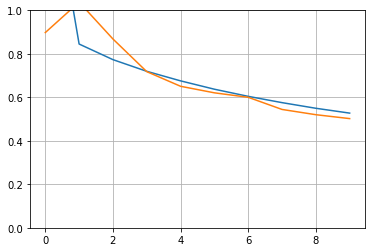

In [48]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [49]:
y_pred

array([[0.4957447],
       [1.3058803],
       [2.7597198]], dtype=float32)

# Saving and Restoring

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [51]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 1.9043 - val_loss: 1.0830
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7506 - val_loss: 0.6737
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6683 - val_loss: 0.6068
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6184 - val_loss: 0.5706
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5827 - val_loss: 0.5386
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5531 - val_loss: 0.5132
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5294 - val_loss: 0.4945
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5088 - val_loss: 0.4685
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4909 - val_loss: 0.4484
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4550


In [52]:
model.save("my_keras_model.h5")

In [53]:
model = keras.models.load_model("my_keras_model.h5")

In [54]:
model.predict(X_new)

1/1 [==============================] - 0s 41ms/step


array([[0.49235332],
       [1.3771662 ],
       [3.1234097 ]], dtype=float32)

In [55]:
model.save_weights("my_keras_weights.ckpt")

In [56]:
model.load_weights("my_keras_weights.ckpt")

# Checkpoint callback

In [57]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

Use save_best_only=True with monitor="acc" for classification or monitor="loss" for regression or classification. This will save the best model among the whole training epochs.

Or use save_freq=number withwith monitor="acc" for classification or monitor="loss" for regression or classification. This will save the best model among every n epochs in your training.

Don't use save_best_only with save_freq

In [58]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

checkpoint_cb = keras.callbacks.ModelCheckpoint("/content/my_keras_model_checkpoint.h5", save_best_only=True, monitor='loss') 
# you can pass an integer to save_freq parameter to save checkpoint after this number of epochs.

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model_checkpoint.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 2.0964 - val_loss: 1.5744
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.8149 - val_loss: 0.7112
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7126 - val_loss: 0.6591
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6645 - val_loss: 0.6053
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6277 - val_loss: 0.5696
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5952 - val_loss: 0.5390
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5674 - val_loss: 0.5166
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5426 - val_loss: 0.4906
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5197 - val_loss: 0.4713
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4919


In [59]:
mse_test

0.4919489324092865